In [3]:
# Problem 1 - bank.csv
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset/bank.csv")
object_cols = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(columns=object_cols)
df_numeric.to_csv("banknumericdata.csv", index=False)
df_numeric2 = pd.read_csv("banknumericdata.csv")
print(df_numeric2.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [4]:
# Problem 2 - medical_students_dataset.csv
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset/medical_students_dataset.csv")
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
df = df.drop_duplicates()
print(df.head())

/tmp/ipython-input-3399539602.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3399539602.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

     Student ID        Age  Gender      Height     Weight Blood Type  \
0      1.000000  18.000000  Female  161.777924  72.354947          O   
1      2.000000  26.021561    Male  152.069157  47.630941          B   
2      3.000000  32.000000  Female  182.537664  55.741083          A   
3  49974.042078  30.000000    Male  182.112867  63.332207          B   
4      5.000000  23.000000  Female  174.947103  46.234173          O   

         BMI  Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes  \
0  27.645835    98.600948        95.0      109.000000        203.0       No   
1  23.338869    98.714977        93.0      104.000000        163.0       No   
2  16.729017    98.260293        76.0      130.000000        216.0      Yes   
3  19.096042    98.839605        99.0      112.000000        141.0       No   
4  23.338869    98.480008        95.0      114.558033        231.0       No   

  Smoking  
0      No  
1      No  
2      No  
3     Yes  
4      No  


In [5]:
# Problem 3 - Titanic Dataset : Fare stats of Pclass = 1
import pandas as pd

titanic = pd.read_csv("//content/drive/MyDrive/dataset/Titanic-Dataset.csv")
subset = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]
subset = subset[subset['Pclass'] == 1]
print(subset['Fare'].mean())
print(subset['Fare'].median())
print(subset['Fare'].max())
print(subset['Fare'].min())

84.1546875
60.287499999999994
512.3292
0.0


In [6]:
# Problem 4 - Drop rows where Age is null
subset = subset.dropna(subset=['Age'])
print(subset.isnull().sum())
print(subset.head())

Name        0
Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64
                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


In [7]:
# Problem 5 - One Hot Encoding Embarked
titanic = pd.read_csv("/content/drive/MyDrive/dataset/Titanic-Dataset.csv")
embarked_encoded = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked_encoded], axis=1)
titanic = titanic.drop(columns=['Embarked'])
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


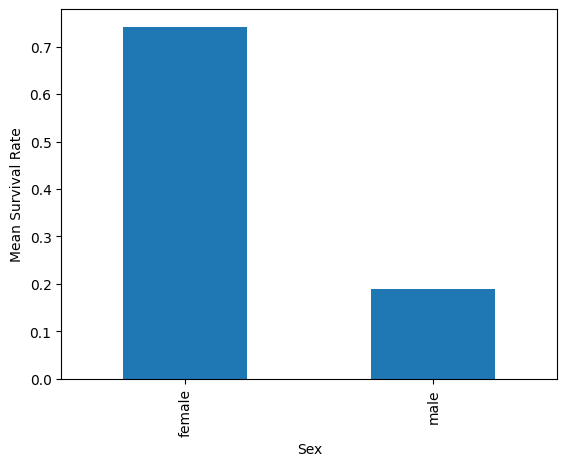

In [8]:
# Problem 6 - Mean survival by Sex (with visualization)
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("/content/drive/MyDrive/dataset/Titanic-Dataset.csv")
mean_survival = titanic.groupby('Sex')['Survived'].mean()
mean_survival.plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.show()

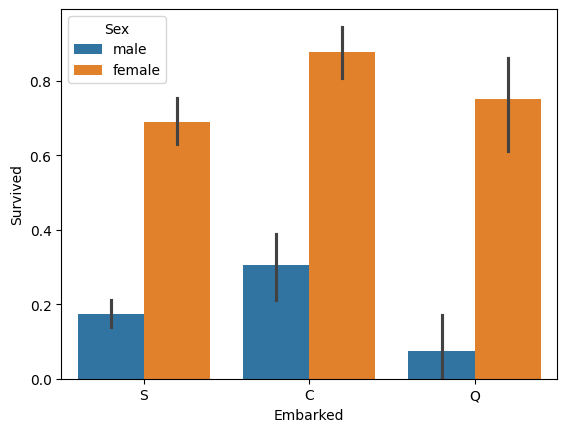

In [9]:
# Problem 7 - Survival by Sex and Embarked (visualization)
import seaborn as sns
sns.barplot(data=titanic, x="Embarked", y="Survived", hue="Sex")
plt.show()